In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
from src import detect_faces, show_bboxes
from PIL import Image

In [7]:
import cv2
from PIL import Image
import time
from src import detect_faces, show_bboxes
import traceback
from PIL import ImageDraw
import warnings
import numpy as np

from src.align_trans import get_reference_facial_points, warp_and_crop_face
refrence = get_reference_facial_points(default_square=True)

warnings.filterwarnings("ignore")
cap = cv2.VideoCapture(0) # D:/CAPSTONE2023/Face.Recognition/data/facebank/pexels_videos_1721303.mp4

cv2.namedWindow('face Capture', cv2.WINDOW_NORMAL)
cv2.resizeWindow('face Capture', 1000, 562)

# cap.set(cv2.CAP_PROP_POS_MSEC, 10000) 
cap.set(3, 1280)
cap.set(4, 720)

# if args.save:
#     video_writer = cv2.VideoWriter(conf.data_path / 'recording.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 6, (1280, 720))
    # frame rate 6 due to my laptop is quite slow...
fps_interval = 1  # Number of seconds between FPS updates
fps_start_time = time.time()
fps_frame_count = 0

while cap.isOpened():
    isSuccess, frame = cap.read()
    if isSuccess:
        try:
            image = Image.fromarray(frame)
            
            bounding_boxes, landmarks = detect_faces(image, thresholds=[0.6, 0.7, 0.85], min_face_size=100)
            if(len(bounding_boxes)>0):
                print('bbox ', bounding_boxes[:1])
            faces = []
            for landmark in landmarks:
                facial5points = [[landmark[j], landmark[j + 5]] for j in range(5)]
                warped_face = warp_and_crop_face(np.array(image), facial5points, refrence, crop_size=(112, 112), align_type='affine')
                faces.append(Image.fromarray(warped_face))

            print('face: ', faces)
            bboxes = bounding_boxes[:, :-1]  # shape:[10,4],only keep 10 highest possibility faces
            bboxes = bboxes.astype(int)
            bboxes = bboxes + [-1, -1, 1, 1]  # personal choice
       
            for idx, bbox in enumerate(bboxes):
                frame = cv2.rectangle(frame,(bbox[0],bbox[1]),(bbox[2],bbox[3]),(0,0,255),6)
                frame = cv2.putText(frame,
                                'thien',
                                (bbox[0],bbox[1]), 
                                cv2.FONT_HERSHEY_SIMPLEX, 
                                2,
                                (0,255,0),
                                3,
                                cv2.LINE_AA)


        except Exception as e:
            pass
            # traceback.print_exc()

        cv2.imshow('face Capture', frame)

        # Calculate FPS
        fps_frame_count += 1
        if time.time() - fps_start_time >= fps_interval:
            fps = fps_frame_count / (time.time() - fps_start_time)
            print("FPS:", round(fps, 2))
            fps_frame_count = 0
            fps_start_time = time.time()

        # if cap.get(cv2.CAP_PROP_POS_MSEC) >= 40000:
        #     break

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

face:  []
FPS: 0.79
face:  []
face:  []
bbox  [[265.30741923 144.05815779 372.21356599 280.99939359   0.85517097]]
face:  [<PIL.Image.Image image mode=RGB size=112x112 at 0x20327D15588>]
bbox  [[265.30741923 144.05815779 372.21356599 280.99939359   0.85517097]]
face:  [<PIL.Image.Image image mode=RGB size=112x112 at 0x20327D62D88>]
face:  []
face:  []
bbox  [[264.8113513  125.13086448 386.64625296 281.02645224   0.95305747]]
face:  [<PIL.Image.Image image mode=RGB size=112x112 at 0x20327D54188>]
bbox  [[264.8113513  125.13086448 386.64625296 281.02645224   0.95305747]]
face:  [<PIL.Image.Image image mode=RGB size=112x112 at 0x20327D62EC8>]
bbox  [[263.46336336 124.98593507 388.70733751 283.04316267   0.9615286 ]]
face:  [<PIL.Image.Image image mode=RGB size=112x112 at 0x20327D6E2C8>]
bbox  [[260.24651966 125.53300448 386.58254946 284.56695694   0.95426267]]
face:  [<PIL.Image.Image image mode=RGB size=112x112 at 0x20327D62F08>]
bbox  [[260.24651966 125.53300448 386.58254946 284.5669569

d:\CAPSTONE2023\Face.API\mtcnn-pytorch\src\first_stage.py:32: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = Variable(torch.FloatTensor(_preprocess(img)), volatile=True)
d:\CAPSTONE2023\Face.API\mtcnn-pytorch\src\get_nets.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
d:\CAPSTONE2023\Face.API\mtcnn-pytorch\src\detector.py:79: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img_boxes = Variable(torch.FloatTensor(img_boxes), volatile=True)
d:\CAPSTONE2023\Face.API\mtcnn-pytorch\src\get_nets.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
d:\CAPSTONE2023\Face.API\mtcnn-pytorch\src\detector.py:100: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
 

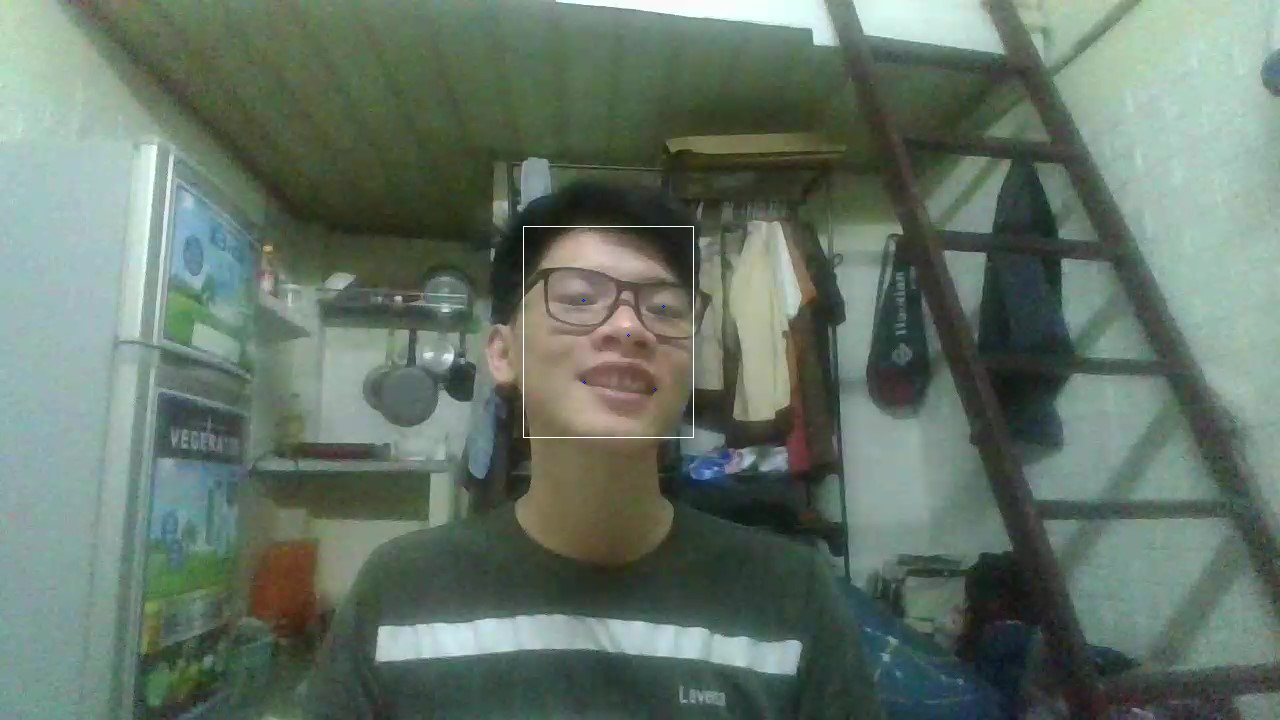

In [2]:
img = Image.open('images/WIN_20230712_10_07_11_Pro.jpg')
bounding_boxes, landmarks = detect_faces(img, 20)
show_bboxes(img, bounding_boxes, landmarks)

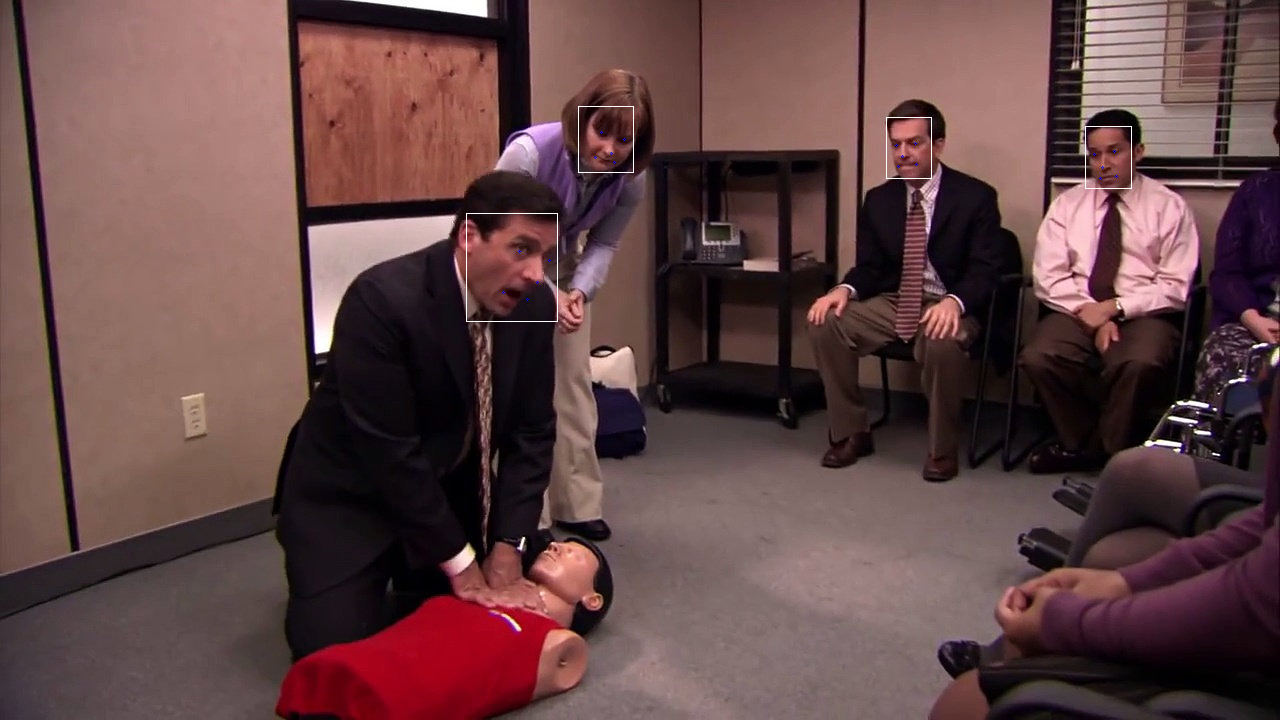

In [4]:
img = Image.open('images/office2.jpg')
bounding_boxes, landmarks = detect_faces(img)
show_bboxes(img, bounding_boxes, landmarks)

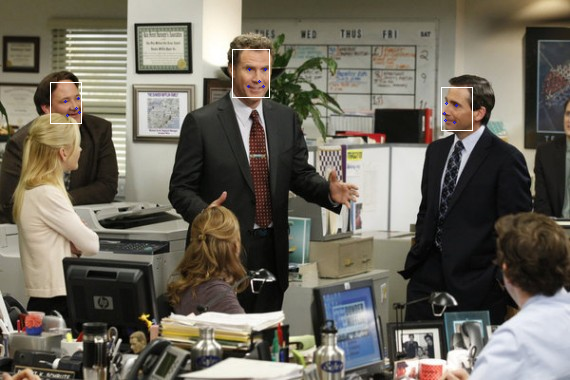

In [5]:
img = Image.open('images/office3.jpg')
bounding_boxes, landmarks = detect_faces(img)
show_bboxes(img, bounding_boxes, landmarks)

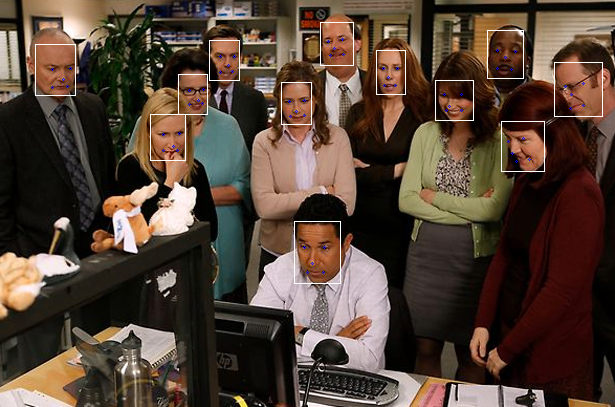

In [6]:
img = Image.open('images/office4.jpg')
bounding_boxes, landmarks = detect_faces(img, thresholds=[0.6, 0.7, 0.85])
show_bboxes(img, bounding_boxes, landmarks)

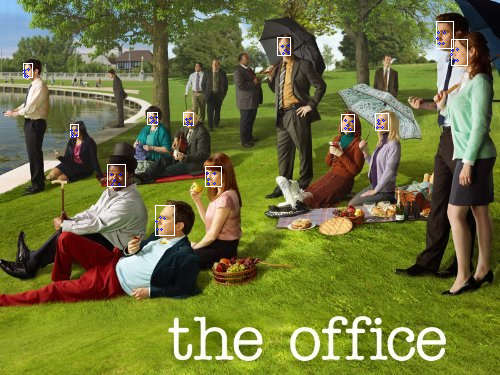

In [7]:
img = Image.open('images/office5.jpg')
bounding_boxes, landmarks = detect_faces(img, min_face_size=10.0)
show_bboxes(img, bounding_boxes, landmarks)